In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Notebook für die Übung Medizininformatik

Dieses Notebook soll einen ersten Einblick in die Arbeit mit Daten und Künstlicher Intelligenz in der Medizin geben. Es ist keineswegs der Anspruch, dass Sie den Code vollständig verstehen, geschweige denn reproduzieren können. Stattdessen sollen Sie ein Gefühl dafür kriegen, wie Daten in Python gehand habt werden und wie das Trainieren eines Machine Learning Modells aussehen
if kann. Sie finden in diesem Notebook aber verschiedene Fragen und eine Aufgabe, die Sie bitte bearbeiten.

## Schritt 1: Daten Laden

Dieser Datensatz stammt von https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data, wo er auch genauer beschrieben wird.

In [13]:
# Datensatz laden
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Hier werden die Namen und deskriptiven Statistiken pro Spalte angezeigt
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,67.542580,0.408759,588.237226,0.423358,38.445255,0.350365,262696.995109,1.355876,136.726277,0.675182,0.324818,0.259124
std,116.864789,0.492504,983.011296,0.494995,11.579899,0.477957,95917.605698,1.002654,4.333391,0.469164,0.469164,0.438956
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,115.750000,0.000000,30.000000,0.000000,215250.000000,0.900000,134.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,261000.000000,1.100000,137.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.300000,140.000000,1.000000,1.000000,1.000000
max,1985.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,1.000000


## Data Cleaning

Der maximal Wert in der Spalte "age" beträgt 1985 - dies ist selbstverständlich unrealistisch. Ersetzt die Zahl hinter "korrekter_wert = " mit eurer besten Idee, wie alt dieser Patient sein könnte.

In [14]:
korrekter_wert = 1985 # Ersetzt diesen Wert für eure beste Idee, welches Alter dieser Patient hat

# Diese Code schaut, wo in unserem DataFrame (df) in der Spalte "age" der Wert 1985 ist
# Für Felder mit dem Wert 1985 ersetzt er diesen Wert mit dem, was wir in korrekter_wert angeben.
# Für alle anderen Werte behält er was vorher in der Spalt "age" stand.

df.age = np.where(df.age==1985, korrekter_wert, df.age)
df.age.max()

np.float64(1985.0)

## Visualisierung
welche Visualiserung könnte spannend sein? Sucht eine der folgenden Code Snippits aus, schreibt einen Spaltennamen, der euch interessiert in die ""  hinter "column =".

In [15]:
column = ""

In [20]:
# Wir visualisieren die Korrelation des Datensatzes. Welche Variable ist am meisten mit "DEATH_EVENT" assoziert?

df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.081455,-0.035996,-0.060173,-0.011354,-0.037080,-0.012039,-0.011829,-0.000079,0.049079,-0.042175,-0.011605
anaemia,0.081455,1.000000,-0.165542,-0.021277,0.073304,-0.003748,-0.070173,0.058837,0.061199,-0.073246,-0.101133,-0.000371
creatinine_phosphokinase,-0.035996,-0.165542,1.000000,-0.031930,-0.075698,-0.057184,0.029236,-0.088220,0.024287,0.092864,0.009840,0.083033
diabetes,-0.060173,-0.021277,-0.031930,1.000000,-0.030450,-0.009945,0.097913,-0.079721,-0.106300,-0.147022,-0.136891,0.015874
ejection_fraction,-0.011354,0.073304,-0.075698,-0.030450,1.000000,0.055762,0.089921,-0.029424,0.214713,-0.158021,-0.070543,-0.266354
high_blood_pressure,-0.037080,-0.003748,-0.057184,-0.009945,0.055762,1.000000,0.031477,0.002033,0.021713,-0.111365,-0.051986,0.089463
platelets,-0.012039,-0.070173,0.029236,0.097913,0.089921,0.031477,1.000000,-0.032346,0.004482,-0.113915,0.013661,-0.069946
serum_creatinine,-0.011829,0.058837,-0.088220,-0.079721,-0.029424,0.002033,-0.032346,1.000000,-0.230635,0.038724,-0.013572,0.288905
serum_sodium,-0.000079,0.061199,0.024287,-0.106300,0.214713,0.021713,0.004482,-0.230635,1.000000,-0.034883,0.016866,-0.191734
sex,0.049079,-0.073246,0.092864,-0.147022,-0.158021,-0.111365,-0.113915,0.038724,-0.034883,1.000000,0.447798,0.090036


## Machine Learning

In [21]:
# Wir importieren die benötigten Packages und Modelle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = df.drop(index=[ 105, 110, 113, 119])

lr = LogisticRegression(solver='liblinear')

# Unsere X Features sind alle Werte, die wir zur Vorhersage nutzen
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]

# unser y Wert ist das, was wir vorhersagen wollen
y = df['DEATH_EVENT']

# Wir teilen unsere Daten in 80% Trainings- und 20% Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
# Beim "fit" berechnet das Modell, welche Funktion sich am besten an die Trainingsdaten anpasst

lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [23]:
# Jetzt können wir schauen, wie gut das Modell auf den Testdaten performed
lr.score(X_test, y_test)

0.75

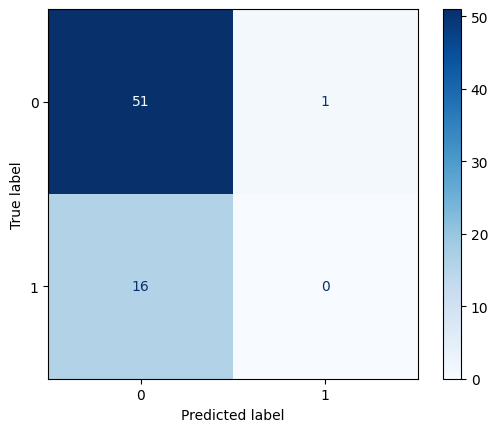

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')